Importing the libraries and models we are going to use through out this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

Getting the training and testing train_datasets (available in spectrum)

In [2]:
train_dataset = pd.read_csv('smartphone_train.csv')

In [3]:
train_dataset.shape

(2000, 21)

In [4]:
train_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train_dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Columns meaning: <br>
- __id__: ID <br>
- __battery_power__: Total energy a battery can store in one time measured in mAh<br> 
- __blue__: Has bluetooth or not<br> 
- __clock_speed__: speed at which microprocessor executes instructions<br> 
- __dual_sim__: Has dual sim support or not<br> 
- __fc__: Front Camera mega pixels<br> 
- __four_g__: Has 4G or not<br> 
- __int_memory__: Internal Memory in Gigabytes<br> 
- __m_dep__: Mobile Depth in cm<br> 
- __mobile_wt__: Weight of mobile phone<br> 
- __n_cores__: Number of cores of processor<br> 
- __pc__: Primary Camera mega pixels<br> 
- __px_height__: Pixel Resolution Height<br> 
- __px_width__: Pixel Resolution Width<br> 
- __ram__: Random Access Memory in Megabytes<br> 
- __sc_h__: Screen Height of mobile in cm<br> 
- __sc_w__: Screen Width of mobile in cm<br> 
- __talk_time__: longest time that a single battery charge will last when you are<br> 
- __three_g__: Has 3G or not<br> 
- __touch_screen__: Has touch screen or not<br> 
- __wifi__: Has wifi or not<br> 
- __price_range__: This is the target variable with value of __0 (low cost)__, __1 (medium cost)__, __2 (high cost)__ and __3 (very high cost)__

We will classify __price_range__.

In [6]:
pd.isnull(train_dataset).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

there is no null values in the dataset. It will ease the preprocessing step.

#### Statistical information

Let's try to understand the data by gettings some statistical information about it

In [7]:
train_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### splitting data

In [8]:
y = train_dataset['price_range']
X = train_dataset.drop('price_range', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Display all possible classes

In [9]:
y_train.unique()

array([3, 2, 0, 1])

## Machine learning algorithms

### SVM

In [10]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [11]:
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
svm_confusion_matrix

array([[ 92,   2,   0,   0],
       [  3,  97,   2,   0],
       [  0,   9, 108,   3],
       [  0,   0,   1,  83]])

In [12]:
svm_accuracy_score = accuracy_score(y_test, y_pred_svm)
svm_accuracy_score

0.95

We can see that the **SVM** model got **95%** accuracy in classifying the smartphone data.

### Logestic Regression

In [13]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [14]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
lr_confusion_matrix

array([[79, 14,  1,  0],
       [12, 69, 19,  2],
       [ 0, 21, 66, 33],
       [ 0,  0, 17, 67]])

In [15]:
lr_accuracy_score = accuracy_score(y_test, y_pred_lr)
lr_accuracy_score

0.7025

We can see that the **Logestic Regression** model got **70%** accuracy in classifying the smartphone data.

### Decision Tree

In [16]:
tree_classifier = DecisionTreeClassifier(criterion = "entropy" , random_state = 100 , max_depth = 7,min_samples_leaf = 4)
tree_classifier.fit(X_train , y_train)
y_pred_tree_classifier = tree_classifier.predict(X_test)

In [17]:
tree_classifier_confusion_matrix = confusion_matrix(y_test, y_pred_tree_classifier)
tree_classifier_confusion_matrix

array([[81, 13,  0,  0],
       [ 6, 92,  4,  0],
       [ 0, 17, 95,  8],
       [ 0,  0,  8, 76]])

In [18]:
tree_classifier_accuracy_score = accuracy_score(y_test, y_pred_tree_classifier)
tree_classifier_accuracy_score

0.86

We can see that the **Logestic Regression** model got **86%** accuracy in classifying the smartphone data.

### Results

<AxesSubplot:>

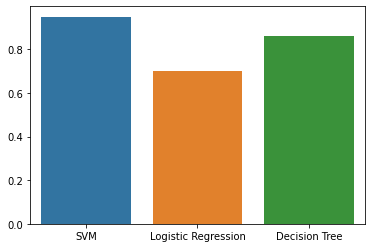

In [19]:
acc_scores = [svm_accuracy_score, lr_accuracy_score, tree_classifier_accuracy_score]
bar_data = pd.DataFrame([acc_scores], columns=['SVM', 'Logistic Regression', 'Decision Tree'])

sns.barplot(data=bar_data)

As **SVM** has the highest score, we will use it for further predicting **smartphone_test** dataset.

## Predicting Smartphone data using best model

From the above trainings we got that **SVM** has the highest score

In [20]:
test_dataset = pd.read_csv('smartphone_test.csv')

In [21]:
test_dataset.shape

(1000, 21)

In [22]:
test_dataset.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [23]:
test_dataset.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In here we don't have **price range**, so our mission is to predict it. Also there is an additional not needed columns **id**.

In [24]:
pd.isnull(test_dataset).sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

We make sure we don't have any null values

In [25]:
test_dataset = test_dataset.drop('id', axis=1)

In [26]:
test_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Prediction
We just need to feed the input columns into our model and then put the result back into **test_dataset**

In [27]:
predicted_price_range = svm_model.predict(test_dataset)
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

Here, there is no way for us to know **100%** that this prediction is correct or not, but based on training score of this model it should be a good approximation

In [28]:
# Appened the predicted price range to the test_dataset
final_dataset = test_dataset.copy()
final_dataset["price_range"] = predicted_price_range

In [29]:
final_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
